In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('KDH-Historical-Data.csv')

In [3]:
# Xử lý dữ liệu trong cột Price
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [4]:
# Thiết lập index
df1=df.reset_index()['Price']

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
# 3. Chia train test 7_3
train_size_7_3 = int(0.7 * len(df1))
test_size_7_3 = len(df1) - train_size_7_3

train_data_7_3 = df1[:train_size_7_3]
test_data_7_3 = df1[train_size_7_3:]

In [7]:
# 3. Chia train test 8_2
train_size_8_2 = int(0.8 * len(df1))
test_size_8_2 = len(df1) - train_size_8_2

train_data_8_2 = df1[:train_size_8_2]
test_data_8_2 = df1[train_size_8_2:]

In [8]:
# 3. Chia train test 9_1
train_size_9_1 = int(0.9 * len(df1))
test_size_9_1 = len(df1) - train_size_9_1

train_data_9_1= df1[:train_size_9_1]
test_data_9_1 = df1[train_size_9_1:]

In [9]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step - 1):
		a = dataset[i:(i + time_step)]
		dataX.append(a)
		dataY.append(dataset[i + time_step])
	return np.array(dataX), np.array(dataY)


In [10]:
# 4. Reshape into X=t,t+1,t+2..t+99 and Y=t+100 _7_3
time_step = 100
X_train_7_3, y_train_7_3 = create_dataset(train_data_7_3, time_step)
X_test_7_3, y_test_7_3 = create_dataset(test_data_7_3, time_step)

# Reshape dữ liệu cho phù hợp với mạng GRU
X_train_7_3 = X_train_7_3.reshape(X_train_7_3.shape[0], X_train_7_3.shape[1], 1)
X_test_7_3 = X_test_7_3.reshape(X_test_7_3.shape[0], X_test_7_3.shape[1], 1)

In [11]:
# 4. Reshape into X=t,t+1,t+2..t+99 and Y=t+100 _8_2
time_step = 100
X_train_8_2, y_train_8_2 = create_dataset(train_data_8_2, time_step)
X_test_8_2, y_test_8_2 = create_dataset(test_data_8_2, time_step)

# Reshape dữ liệu cho phù hợp với mạng GRU
X_train_8_2 = X_train_8_2.reshape(X_train_8_2.shape[0], X_train_8_2.shape[1], 1)
X_test_8_2 = X_test_8_2.reshape(X_test_8_2.shape[0], X_test_8_2.shape[1], 1)

In [12]:
# 4. Reshape into X=t,t+1,t+2..t+99 and Y=t+100 _9_1
time_step = 100
X_train_9_1, y_train_9_1 = create_dataset(train_data_9_1, time_step)
X_test_9_1, y_test_9_1 = create_dataset(test_data_9_1, time_step)

# Reshape dữ liệu cho phù hợp với mạng GRU
X_train_9_1 = X_train_9_1.reshape(X_train_9_1.shape[0], X_train_9_1.shape[1], 1)
X_test_9_1 = X_test_9_1.reshape(X_test_9_1.shape[0], X_test_9_1.shape[1], 1)

In [13]:
# 5. Define GRU Model

model_7_3 = Sequential()
model_7_3.add(GRU(64, input_shape=(time_step, 1)))
model_7_3.add(Dense(1))
model_7_3.compile(optimizer='adam', loss='mean_squared_error')
model_8_2 = Sequential()
model_8_2.add(GRU(64, input_shape=(time_step, 1)))
model_8_2.add(Dense(1))
model_8_2.compile(optimizer='adam', loss='mean_squared_error')
model_9_1 = Sequential()
model_9_1.add(GRU(64, input_shape=(time_step, 1)))
model_9_1.add(Dense(1))
model_9_1.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# 6. Fit mô hình với dữ liệu train
model_7_3.fit(X_train_7_3, y_train_7_3, epochs=50, batch_size=64, verbose=1)


Epoch 1/50
19/19 [==============================] - 5s 82ms/step - loss: 0.0296
Epoch 2/50
19/19 [==============================] - 1s 51ms/step - loss: 0.0051
Epoch 3/50
19/19 [==============================] - 1s 51ms/step - loss: 0.0011
Epoch 4/50
19/19 [==============================] - 1s 50ms/step - loss: 2.9533e-04
Epoch 5/50
19/19 [==============================] - 1s 53ms/step - loss: 2.3292e-04
Epoch 6/50
19/19 [==============================] - 1s 50ms/step - loss: 2.2034e-04
Epoch 7/50
19/19 [==============================] - 1s 50ms/step - loss: 2.2283e-04
Epoch 8/50
19/19 [==============================] - 1s 50ms/step - loss: 2.1490e-04
Epoch 9/50
19/19 [==============================] - 1s 49ms/step - loss: 2.0810e-04
Epoch 10/50
19/19 [==============================] - 1s 51ms/step - loss: 2.2624e-04
Epoch 11/50
19/19 [==============================] - 1s 49ms/step - loss: 2.0631e-04
Epoch 12/50
19/19 [==============================] - 1s 71ms/step - loss: 2.0585e-04
E

In [15]:
model_8_2.fit(X_train_8_2, y_train_8_2, epochs=50, batch_size=64, verbose=1)


Epoch 1/50
21/21 [==============================] - 3s 52ms/step - loss: 0.0214
Epoch 2/50
21/21 [==============================] - 1s 54ms/step - loss: 0.0025
Epoch 3/50
21/21 [==============================] - 1s 51ms/step - loss: 5.7886e-04
Epoch 4/50
21/21 [==============================] - 1s 52ms/step - loss: 2.9986e-04
Epoch 5/50
21/21 [==============================] - 1s 51ms/step - loss: 2.7216e-04
Epoch 6/50
21/21 [==============================] - 1s 53ms/step - loss: 2.6077e-04
Epoch 7/50
21/21 [==============================] - 2s 75ms/step - loss: 2.5451e-04
Epoch 8/50
21/21 [==============================] - 2s 86ms/step - loss: 2.5018e-04
Epoch 9/50
21/21 [==============================] - 1s 64ms/step - loss: 2.4169e-04
Epoch 10/50
21/21 [==============================] - 1s 50ms/step - loss: 2.4302e-04
Epoch 11/50
21/21 [==============================] - 1s 51ms/step - loss: 2.3833e-04
Epoch 12/50
21/21 [==============================] - 1s 52ms/step - loss: 2.3125e-

In [16]:
model_9_1.fit(X_train_9_1, y_train_9_1, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
24/24 [==============================] - 4s 51ms/step - loss: 0.0559
Epoch 2/50
24/24 [==============================] - 1s 51ms/step - loss: 0.0065
Epoch 3/50
24/24 [==============================] - 1s 51ms/step - loss: 0.0014
Epoch 4/50
24/24 [==============================] - 1s 49ms/step - loss: 4.8469e-04
Epoch 5/50
24/24 [==============================] - 1s 49ms/step - loss: 4.4056e-04
Epoch 6/50
24/24 [==============================] - 1s 49ms/step - loss: 4.2471e-04
Epoch 7/50
24/24 [==============================] - 1s 49ms/step - loss: 4.1005e-04
Epoch 8/50
24/24 [==============================] - 1s 49ms/step - loss: 3.9193e-04
Epoch 9/50
24/24 [==============================] - 2s 72ms/step - loss: 3.8045e-04
Epoch 10/50
24/24 [==============================] - 2s 82ms/step - loss: 3.7143e-04
Epoch 11/50
24/24 [==============================] - 1s 56ms/step - loss: 3.6197e-04
Epoch 12/50
24/24 [==============================] - 1s 50ms/step - loss: 3.5553e-04
E

In [17]:
# 10. Dự báo dữ liệu test và train _7_3
train_predict_7_3 = model_7_3.predict(X_train_7_3)
y_pred_7_3 = model_7_3.predict(X_test_7_3)

14/14 [==============================] - 0s 12ms/step


In [18]:
# 10. Dự báo dữ liệu test và train _8_2
train_predict_8_2 = model_8_2.predict(X_train_8_2)
y_pred_8_2 = model_8_2.predict(X_test_8_2)

9/9 [==============================] - 0s 12ms/step


In [19]:
# 10. Dự báo dữ liệu test và train _9_1
train_predict_9_1 = model_9_1.predict(X_train_9_1)
y_pred_9_1 = model_9_1.predict(X_test_9_1)

3/3 [==============================] - 0s 20ms/step


In [20]:
# 11. Chuẩn hóa dữ liệu y_pred, _7_3
train_predict_7_3 = scaler.inverse_transform(train_predict_7_3)
y_pred_7_3 = scaler.inverse_transform(y_pred_7_3)

In [21]:
# 11. Chuẩn hóa dữ liệu y_pred, _8_2
train_predict_8_2 = scaler.inverse_transform(train_predict_8_2)
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2)

In [22]:
# 11. Chuẩn hóa dữ liệu y_pred, _9_1
train_predict_9_1 = scaler.inverse_transform(train_predict_9_1)
y_pred_9_1 = scaler.inverse_transform(y_pred_9_1)

In [23]:
# 13. Dự báo 30 ngày tiếp theo
x_input_7_3 = test_data_7_3[-100:].reshape(1, -1)
temp_input_7_3 = list(x_input_7_3[0])
lst_output_7_3 = []

i = 0
while(i < 30):
    if len(temp_input_7_3) > 100:
        x_input_7_3 = np.array(temp_input_7_3[1:])  # Lấy từng ngày từ ngày thứ 2 trở đi
        x_input_7_3 = x_input_7_3.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_7_3 = model_7_3.predict(x_input_7_3, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_7_3.extend(yhat_7_3[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        temp_input_7_3 = temp_input_7_3[1:]  # Loại bỏ ngày đầu tiên
        lst_output_7_3.extend(yhat_7_3.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1
    else:
        x_input_7_3 = x_input_7_3.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_7_3 = model_7_3.predict(x_input_7_3, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_7_3.extend(yhat_7_3[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        lst_output_7_3.extend(yhat_7_3.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1

# In ra dự đoán cho 30 ngày tiếp theo
print("Dự đoán giá cho 30 ngày tiếp theo:")
print(lst_output_7_3)

Dự đoán giá cho 30 ngày tiếp theo:
[[0.6570498943328857], [0.6606937050819397], [0.6643890738487244], [0.668106734752655], [0.6718519926071167], [0.6756267547607422], [0.6794296503067017], [0.6832594871520996], [0.6871150135993958], [0.6909949779510498], [0.6948987245559692], [0.6988250613212585], [0.7027736306190491], [0.7067435383796692], [0.7107346653938293], [0.7147459983825684], [0.7187780737876892], [0.7228298187255859], [0.7269014120101929], [0.7309923768043518], [0.7351025938987732], [0.7392316460609436], [0.7433793544769287], [0.7475457191467285], [0.7517304420471191], [0.7559329867362976], [0.7601537704467773], [0.7643918395042419], [0.7686474323272705], [0.7729201316833496]]


In [24]:
x_input_8_2 = test_data_8_2[-100:].reshape(1, -1)
temp_input_8_2 = list(x_input_8_2[0])
lst_output_8_2 = []

i = 0
while(i < 30):
    if len(temp_input_8_2) > 100:
        x_input_8_2 = np.array(temp_input_8_2[1:])  # Lấy từng ngày từ ngày thứ 2 trở đi
        x_input_8_2 = x_input_8_2.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_8_2 = model_8_2.predict(x_input_8_2, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_8_2.extend(yhat_8_2[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        temp_input_8_2 = temp_input_8_2[1:]  # Loại bỏ ngày đầu tiên
        lst_output_8_2.extend(yhat_8_2.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1
    else:
        x_input_8_2 = x_input_8_2.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_8_2 = model_8_2.predict(x_input_8_2, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_8_2.extend(yhat_8_2[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        lst_output_8_2.extend(yhat_8_2.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1

# In ra dự đoán cho 30 ngày tiếp theo
print("Dự đoán giá cho 30 ngày tiếp theo:")
print(lst_output_8_2)


Dự đoán giá cho 30 ngày tiếp theo:
[[0.6463539004325867], [0.6444618105888367], [0.6425815224647522], [0.640656054019928], [0.6386805176734924], [0.636657178401947], [0.6345899701118469], [0.6324838995933533], [0.630342960357666], [0.6281710863113403], [0.6259722113609314], [0.6237497925758362], [0.6215072274208069], [0.6192472577095032], [0.6169728636741638], [0.6146864295005798], [0.6123906373977661], [0.6100874543190002], [0.6077789664268494], [0.605466902256012], [0.6031529903411865], [0.6008388996124268], [0.5985258221626282], [0.5962153673171997], [0.5939086675643921], [0.5916066765785217], [0.589310348033905], [0.5870206356048584], [0.5847384333610535], [0.582464337348938]]


In [25]:
x_input_9_1 = test_data_9_1[-100:].reshape(1, -1)
temp_input_9_1 = list(x_input_9_1[0])
lst_output_9_1 = []

i = 0
while(i < 30):
    if len(temp_input_9_1) > 100:
        x_input_9_1 = np.array(temp_input_9_1[1:])  # Lấy từng ngày từ ngày thứ 2 trở đi
        x_input_9_1 = x_input_9_1.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_9_1 = model_9_1.predict(x_input_9_1, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_9_1.extend(yhat_9_1[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        temp_input_9_1 = temp_input_9_1[1:]  # Loại bỏ ngày đầu tiên
        lst_output_9_1.extend(yhat_9_1.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1
    else:
        x_input_9_1 = x_input_9_1.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_9_1 = model_9_1.predict(x_input_9_1, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_9_1.extend(yhat_9_1[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        lst_output_9_1.extend(yhat_9_1.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1

# In ra dự đoán cho 30 ngày tiếp theo
print("Dự đoán giá cho 30 ngày tiếp theo:")
print(lst_output_9_1)


Dự đoán giá cho 30 ngày tiếp theo:
[[0.6443318724632263], [0.6403465270996094], [0.636500895023346], [0.6326212882995605], [0.6286967396736145], [0.6247304081916809], [0.6207262873649597], [0.616689145565033], [0.6126229166984558], [0.608531653881073], [0.6044188737869263], [0.6002877950668335], [0.5961415767669678], [0.5919830203056335], [0.58781498670578], [0.5836400985717773], [0.5794604420661926], [0.5752784609794617], [0.5710965991020203], [0.5669165849685669], [0.5627408623695374], [0.5585710406303406], [0.5544089674949646], [0.5502564907073975], [0.5461149215698242], [0.5419861078262329], [0.5378714203834534], [0.5337719917297363], [0.5296893119812012], [0.5256243348121643]]


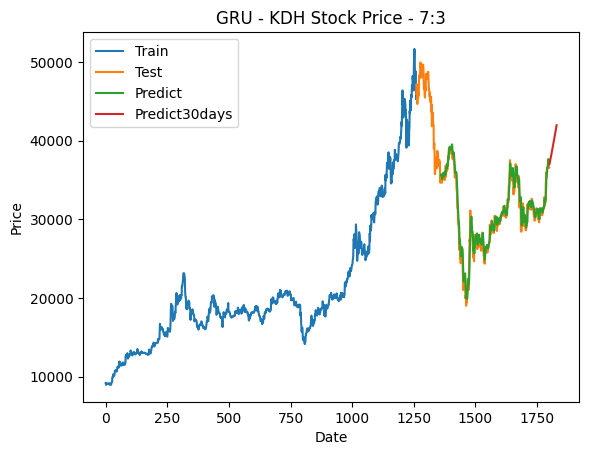

In [26]:
train_data_index_7_3 = pd.RangeIndex(start=0, stop=len(train_data_7_3), step=1)
plt.plot(train_data_index_7_3, scaler.inverse_transform(train_data_7_3), label='Train')

test_data_index_7_3 = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+len(test_data_7_3), step=1)
plt.plot(test_data_index_7_3, scaler.inverse_transform(test_data_7_3), label='Test')

predicted_test_index_7_3 = pd.RangeIndex(start=train_size_7_3+time_step, stop=train_size_7_3+len(y_pred_7_3)+time_step, step=1)
plt.plot(predicted_test_index_7_3, y_pred_7_3, label='Predicted Test')

future_index_7_3 = pd.RangeIndex(start=test_data_index_7_3[-1]+1, stop=test_data_index_7_3[-1]+31, step=1)
plt.plot(future_index_7_3, scaler.inverse_transform(lst_output_7_3), label='Predicted 30 days')

plt.title('GRU - KDH Stock Price - 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

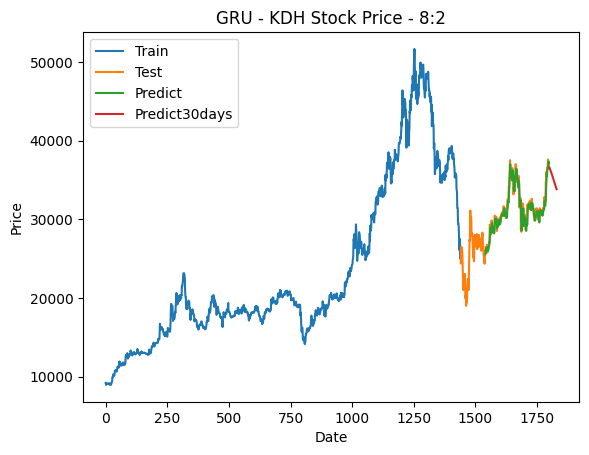

In [27]:
# Assume train_data_8_2, test_data_8_2, y_pred_8_2, lst_output_8_2, and train_size_8_2 are already defined

# Train data index
train_data_index_8_2 = pd.RangeIndex(start=0, stop=len(train_data_8_2), step=1)
plt.plot(train_data_index_8_2, scaler.inverse_transform(train_data_8_2), label='Train')

# Test data index
test_data_index_8_2 = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+len(test_data_8_2), step=1)
plt.plot(test_data_index_8_2, scaler.inverse_transform(test_data_8_2), label='Test')

# Predicted test data index
predicted_test_index_8_2 = pd.RangeIndex(start=train_size_8_2+time_step, stop=train_size_8_2+len(y_pred_8_2)+time_step, step=1)
plt.plot(predicted_test_index_8_2, y_pred_8_2, label='Predicted Test')

# Future predictions index
future_index_8_2 = pd.RangeIndex(start=test_data_index_8_2[-1]+1, stop=test_data_index_8_2[-1]+31, step=1)
plt.plot(future_index_8_2, scaler.inverse_transform(lst_output_8_2), label='Predicted 30 days')

# Plot details
plt.title('GRU - KDH Stock Price - 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()


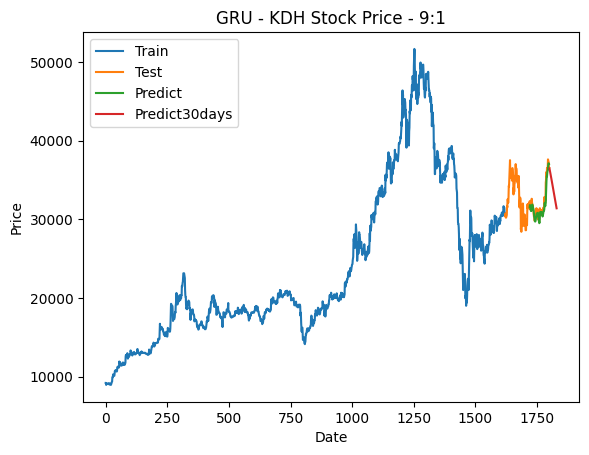

In [28]:
# Assume train_data_9_1, test_data_9_1, y_pred_9_1, lst_output_9_1, and train_size_9_1 are already defined

# Train data index
train_data_index_9_1 = pd.RangeIndex(start=0, stop=len(train_data_9_1), step=1)
plt.plot(train_data_index_9_1, scaler.inverse_transform(train_data_9_1), label='Train')

# Test data index
test_data_index_9_1 = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1 + len(test_data_9_1), step=1)
plt.plot(test_data_index_9_1, scaler.inverse_transform(test_data_9_1), label='Test')

# Predicted test data index
predicted_test_index_9_1 = pd.RangeIndex(start=train_size_9_1 + time_step, stop=train_size_9_1 + len(y_pred_9_1) + time_step, step=1)
plt.plot(predicted_test_index_9_1, y_pred_9_1, label='Predicted Test')

# Future predictions index
future_index_9_1 = pd.RangeIndex(start=test_data_index_9_1[-1] + 1, stop=test_data_index_9_1[-1] + 31, step=1)
plt.plot(future_index_9_1, scaler.inverse_transform(lst_output_9_1), label='Predicted 30 days')

# Plot details
plt.title('GRU - KDH Stock Price - 9:1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])
plt.show()
